## IMPLEMENTING A SIMPLIFIED ATTENTION MECHANISM

we'll implement a simple attention mechanism on a sentence , without using any learnable parameters , the word embedding will be taken from pre trained embeddings


In [ ]:
!pip install --upgrade pip
!pip install numpy==1.24.3 scipy==1.10.1
!pip install gensim==4.3.2

In [ ]:
import gensim.downloader as api
model = api.load("glove-wiki-gigaword-100")

In [ ]:
import numpy as np
sentence = "the cat sat on the mat and chased the mouse"
words = sentence.split()
listi = []
for word in words:
  if word in model:
    listi.append(model[word])



In [ ]:
listi = np.array(listi)

the length of embedding vector for each word is 100

In [ ]:
listi.shape

(10, 100)

In [ ]:
for word in words:
  print(model.most_similar(word))

[('this', 0.8573122024536133), ('part', 0.8507951498031616), ('one', 0.8503074049949646), ('of', 0.8328992128372192), ('same', 0.8324545621871948), ('first', 0.8210473656654358), ('on', 0.8199756741523743), ('its', 0.8169469237327576), ('as', 0.8128418922424316), ('that', 0.8079659938812256)]
[('dog', 0.8798074722290039), ('rabbit', 0.7424427270889282), ('cats', 0.732300341129303), ('monkey', 0.7288709878921509), ('pet', 0.719014048576355), ('dogs', 0.7163872718811035), ('mouse', 0.6915250420570374), ('puppy', 0.6800068020820618), ('rat', 0.6641027331352234), ('spider', 0.6501135230064392)]
[('sitting', 0.7806496620178223), ('stood', 0.659519374370575), ('room', 0.6261236071586609), ('sit', 0.6258078813552856), ('waited', 0.6119008660316467), ('standing', 0.6107473969459534), ('seated', 0.6096089482307434), ('walked', 0.604537308216095), ('silently', 0.5914179086685181), ('looked', 0.5871621370315552)]
[('the', 0.8199756741523743), ('over', 0.8062289357185364), ('for', 0.80304217338562

for doing this simplified version of attention we take 3 copies of the original sentence matrx namely K, Q AND V
THEN WE APPLY SOFTMAX((K.Q(trans))/root(dk)).V


here we have dk = 100

In [ ]:
K = listi
Q = listi
V = listi

In [ ]:
import math
k_q = np.dot(K,Q.T)
k_q = k_q/math.sqrt(100)

In [ ]:
print(k_q)
print(k_q.shape)

[[3.388583   0.9576414  1.0720558  2.937289   3.388583   0.37534466
  2.4811263  0.69589454 3.388583   0.85644275]
 [0.9576414  2.5394716  0.59489816 1.0161438  0.9576414  0.39217338
  0.8963723  0.672602   0.9576414  1.9429573 ]
 [1.0720558  0.59489816 2.796368   1.341482   1.0720558  0.8625306
  1.0094395  0.61256176 1.0720558  0.38100666]
 [2.937289   1.0161438  1.341482   3.7868094  2.937289   0.5552384
  2.6063125  0.7063878  2.937289   0.8249572 ]
 [3.388583   0.9576414  1.0720558  2.937289   3.388583   0.37534466
  2.4811263  0.69589454 3.388583   0.85644275]
 [0.37534466 0.39217338 0.8625306  0.5552384  0.37534466 2.3494344
  0.36765507 0.2288665  0.37534466 0.34833533]
 [2.4811263  0.8963723  1.0094395  2.6063125  2.4811263  0.36765507
  3.2124038  0.7185889  2.4811263  0.72135425]
 [0.69589454 0.672602   0.61256176 0.7063878  0.69589454 0.2288665
  0.7185889  1.950371   0.69589454 0.37430602]
 [3.388583   0.9576414  1.0720558  2.937289   3.388583   0.37534466
  2.4811263  0.6

In [ ]:
softmax = np.zeros_like(k_q)
for i in range (k_q.shape[0]):
  sum = np.sum(np.exp(k_q[i]))
  for j in range (k_q.shape[1]):
      softmax[i][j] = np.exp(k_q[i][j]) / sum


In [ ]:
softmax

array([[0.22607851, 0.01988451, 0.02229484, 0.14396763, 0.22607851,
        0.01110776, 0.09123383, 0.01530522, 0.22607851, 0.01797069],
       [0.06868524, 0.33407468, 0.04778879, 0.07282336, 0.06868524,
        0.03901969, 0.06460328, 0.05165024, 0.06868524, 0.18398425],
       [0.07450818, 0.04623566, 0.41789117, 0.09754708, 0.07450818,
        0.06042384, 0.06998581, 0.0470596 , 0.07450818, 0.03733233],
       [0.14866176, 0.02176991, 0.03014041, 0.34764925, 0.14866176,
        0.01373055, 0.10677215, 0.01597097, 0.14866176, 0.01798147],
       [0.22607851, 0.01988451, 0.02229484, 0.14396763, 0.22607851,
        0.01110776, 0.09123383, 0.01530522, 0.22607851, 0.01797069],
       [0.05927229, 0.0602782 , 0.09647924, 0.07095428, 0.05927229,
        0.42676422, 0.05881826, 0.05119612, 0.05927229, 0.05769281],
       [0.14064421, 0.02883181, 0.03228319, 0.15940043, 0.14064421,
        0.01699233, 0.29222113, 0.02413579, 0.14064421, 0.02420263],
       [0.08482926, 0.08287621, 0.0780467

In [ ]:
softmax1 = np.exp(k_q) / np.sum(np.exp(k_q), axis = 1, keepdims = True)

In [ ]:
softmax1

array([[0.22607851, 0.01988451, 0.02229484, 0.14396763, 0.22607851,
        0.01110776, 0.09123383, 0.01530522, 0.22607851, 0.01797069],
       [0.06868524, 0.33407468, 0.04778879, 0.07282336, 0.06868524,
        0.03901969, 0.06460328, 0.05165024, 0.06868524, 0.18398425],
       [0.07450818, 0.04623566, 0.41789117, 0.09754708, 0.07450818,
        0.06042384, 0.06998581, 0.0470596 , 0.07450818, 0.03733233],
       [0.14866176, 0.02176991, 0.03014041, 0.34764925, 0.14866176,
        0.01373055, 0.10677215, 0.01597097, 0.14866176, 0.01798147],
       [0.22607851, 0.01988451, 0.02229484, 0.14396763, 0.22607851,
        0.01110776, 0.09123383, 0.01530522, 0.22607851, 0.01797069],
       [0.05927229, 0.0602782 , 0.09647924, 0.07095428, 0.05927229,
        0.42676422, 0.05881826, 0.05119612, 0.05927229, 0.05769281],
       [0.14064421, 0.02883181, 0.03228319, 0.15940043, 0.14064421,
        0.01699233, 0.29222113, 0.02413579, 0.14064421, 0.02420263],
       [0.08482926, 0.08287621, 0.0780467

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

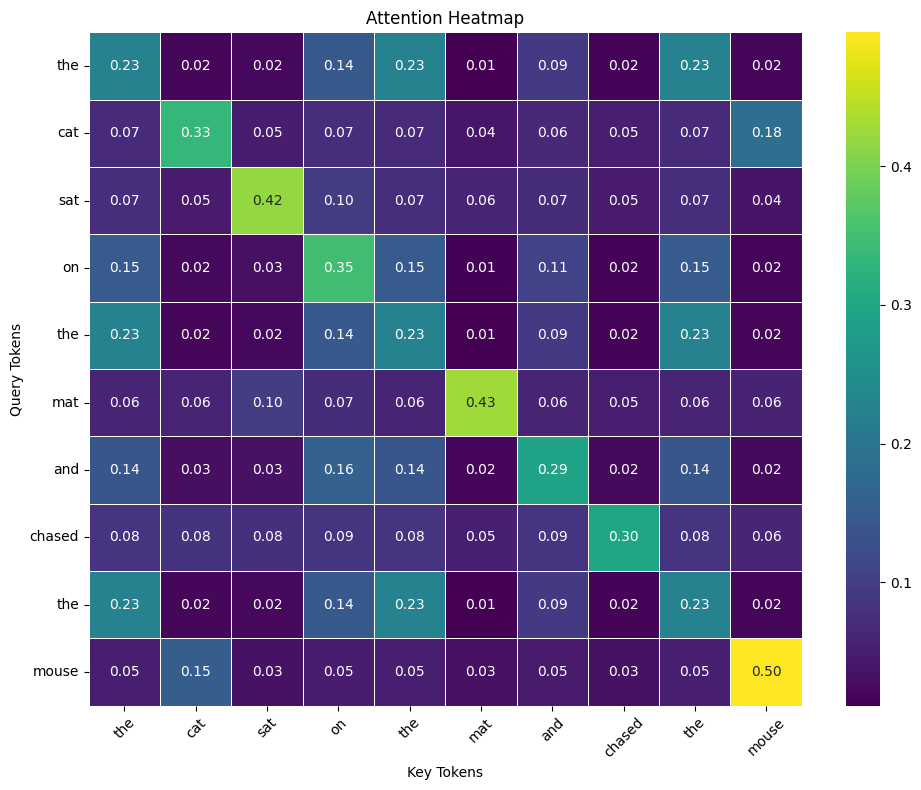

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(softmax1,
            xticklabels=words,
            yticklabels=words,
            cmap="viridis",
            annot=True,
            fmt=".2f",
            linewidths=0.5)

plt.title("Attention Heatmap")
plt.xlabel("Key Tokens")
plt.ylabel("Query Tokens")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
attention = np.dot(softmax, V)

In [ ]:
attention.shape

(10, 100)

## SINGLE HEADED ATTENTION (WITH TRAINABLE PARAMETERS)

In [ ]:
import torch

In [ ]:
Q = torch.tensor(Q)
K = torch.tensor(K)
V = torch.tensor(V)
W_Q = torch.randn(Q.shape[1],Q.shape[1])
W_K = torch.randn(K.shape[1],K.shape[1])
W_V = torch.randn(V.shape[1],V.shape[1])

<ipython-input-119-9311b1e1f340>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Q = torch.tensor(Q)
<ipython-input-119-9311b1e1f340>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  K = torch.tensor(K)
<ipython-input-119-9311b1e1f340>:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  V = torch.tensor(V)


In [ ]:
Q_ = Q @ W_Q
K_ = K @ W_K
V_ = K @ W_V

In [ ]:
Q_.shape


torch.Size([10, 100])

In [ ]:
K_Q_ = np.dot(K_,Q_.T)
K_Q_ = K_Q_/math.sqrt(100)

In [ ]:
softmax2 = np.exp(K_Q_) / np.sum(np.exp(K_Q_), axis = 1, keepdims = True)

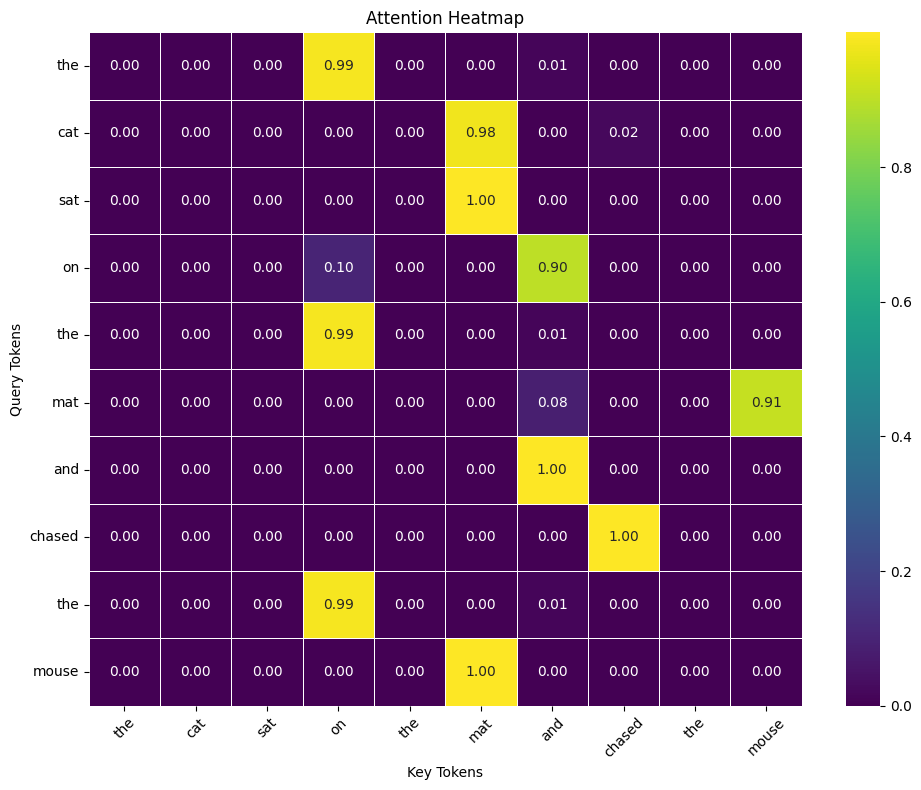

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(softmax2,
            xticklabels=words,
            yticklabels=words,
            cmap="viridis",
            annot=True,
            fmt=".2f",
            linewidths=0.5)

plt.title("Attention Heatmap")
plt.xlabel("Key Tokens")
plt.ylabel("Query Tokens")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

this output doesnt make sense due to the werights being random

##MULTIHEADED ATTENTION

In [ ]:
import numpy as np
sentence = "the cat sat on the mat and chased the mouse"
words = sentence.split()
listi = []
for word in words:
  if word in model:
    listi.append(model[word])


In [ ]:
input = np.array(listi)
input.shape

(10, 100)

In [ ]:
sequence = len(words)
d_model = input.shape[1]
h = 5
dk = d_model // h
W_O = torch.randn(d_model, d_model)

In [ ]:
Q = torch.tensor(input)
K = torch.tensor(input)
V = torch.tensor(input)

In [ ]:
W_K = torch.randn(d_model, d_model)
W_Q = torch.randn(d_model, d_model)
W_V = torch.randn(d_model, d_model)

In [ ]:
Q_dash = Q @ W_Q
K_dash = K @ W_K
V_dash = V @ W_V

In [ ]:
def softmax_func(x):
  return torch.exp(x) / torch.sum(torch.exp(x), dim=1, keepdim=True)

def causal_attention(Q, K, V, d_k):
  qk = Q @ K.T
  qk = qk / math.sqrt(d_k)
  mask = torch.triu(torch.ones(seq_len, seq_len), diagonal=1).bool()
  qk = qk.masked_fill(mask, float('-inf'))
  softmax_out = softmax_func(qk)
  attention = softmax_out @ V
  return attention

In [ ]:
def multiheaded(Q_, K_, V_,h,dk, W_O):
  parts_k = torch.split(K_, int(dk), dim=1)
  parts_q = torch.split(Q_, int(dk), dim=1)
  parts_v = torch.split(V_, int(dk), dim=1)
  head = []
  for i in range(h):
    head_output = attention(parts_q[i], parts_k[i], parts_v[i], dk)
    head.append(head_output)
  H = torch.cat(head, dim = 1)
  output = H @ W_O
  return output


In [ ]:
output = multiheaded(Q_dash, K_dash, V_dash, h, dk, W_O)